In [38]:
#read ghanor file on ../../DataEng/datalake/silver/ghanor.csv
import pandas as pd

df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df.head()

,raisedAmount,supporters,timestamp
0,5148832.0,5032,2023-10-10 08:24:03
1,5872819.0,5543,2023-10-21 00:07:03
2,5812795.0,5484,2023-10-19 17:34:05
3,5773540.0,5439,2023-10-18 11:29:04
4,5962171.0,5630,2023-10-24 13:34:03


In [39]:
pip 


Usage:   
  /home/alura/projeto_ghanor/DataScience/.venv/bin/python -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of 

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the data for dates before "2023-11-10"
historical_data = df[df['timestamp'] < '2023-11-10']

# Convert the timestamp to Unix timestamps (numeric representation of time)
historical_data['timestamp_numeric'] = historical_data['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = historical_data[['timestamp_numeric']]
y = historical_data['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Convert the prediction date to a numeric timestamp
prediction_date = datetime(2023, 11, 10)
prediction_date_numeric = prediction_date.timestamp()

# Predict the "raisedAmount" for "2023-11-10"
prediction = model.predict([[prediction_date_numeric]])

# Print the predicted value
print("Predicted raisedAmount on 2023-11-10:", prediction[0])


Predicted raisedAmount on 2023-11-10: 7146525.058286667


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


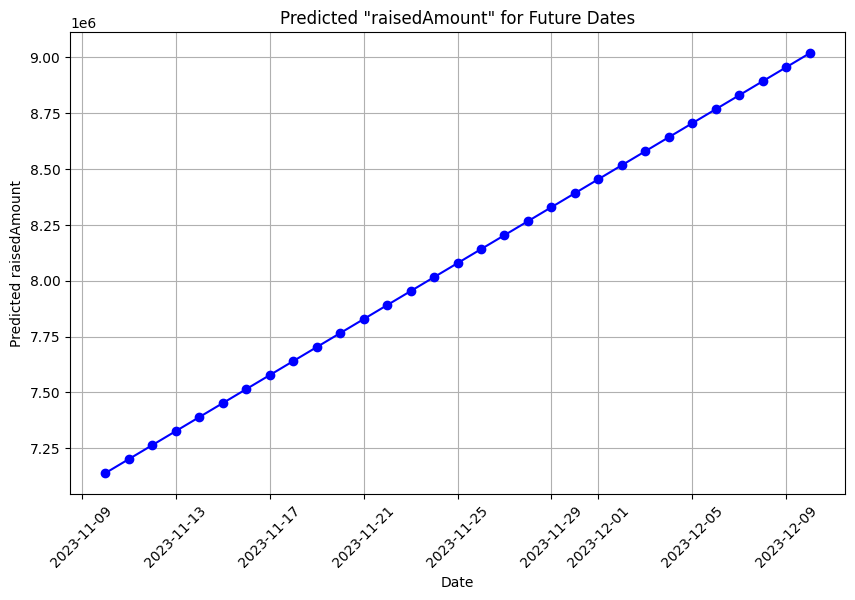

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the data for dates before "2023-11-10"
historical_data = df[df['timestamp'] < '2023-11-10']

# Convert the timestamp to Unix timestamps (numeric representation of time)
historical_data['timestamp_numeric'] = historical_data['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = historical_data[['timestamp_numeric']]
y = historical_data['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create future date range for prediction
start_date = datetime(2023, 11, 10)
end_date = start_date + timedelta(days=30)  # Extend prediction for 30 days
date_range = pd.date_range(start_date, end_date, freq='D')
date_range_numeric = [d.timestamp() for d in date_range]

# Predict the "raisedAmount" for future dates
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(date_range, future_predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted "raisedAmount" for Future Dates')
plt.xlabel('Date')
plt.ylabel('Predicted raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


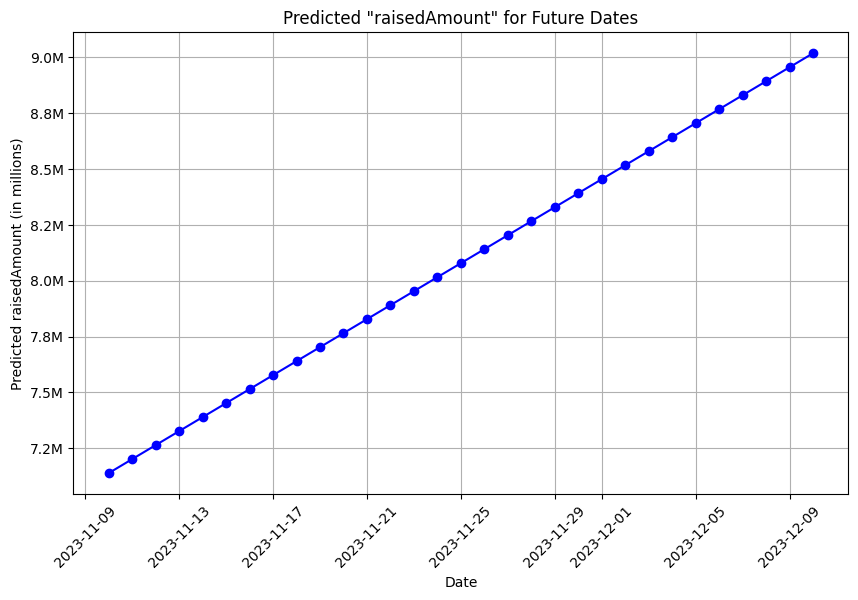

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the data for dates before "2023-11-10"
historical_data = df[df['timestamp'] < '2023-11-10']

# Convert the timestamp to Unix timestamps (numeric representation of time)
historical_data['timestamp_numeric'] = historical_data['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = historical_data[['timestamp_numeric']]
y = historical_data['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create future date range for prediction
start_date = datetime(2023, 11, 10)
end_date = start_date + timedelta(days=30)  # Extend prediction for 30 days
date_range = pd.date_range(start_date, end_date, freq='D')
date_range_numeric = [d.timestamp() for d in date_range]

# Predict the "raisedAmount" for future dates
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Create a custom formatter to display values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(date_range, future_predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted "raisedAmount" for Future Dates')
plt.xlabel('Date')
plt.ylabel('Predicted raisedAmount (in millions)')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


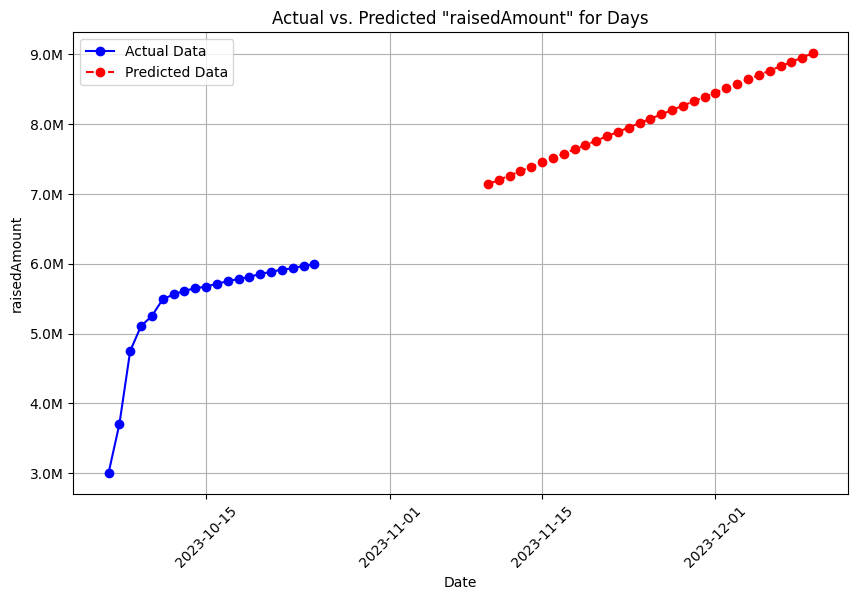

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the data for dates before "2023-11-10"
historical_data = df[df['timestamp'] < '2023-11-10']

# Convert the timestamp to Unix timestamps (numeric representation of time)
historical_data['timestamp_numeric'] = historical_data['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = historical_data[['timestamp_numeric']]
y = historical_data['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create future date range for prediction
start_date = datetime(2023, 11, 10)
end_date = start_date + timedelta(days=30)  # Extend prediction for 30 days
date_range = pd.date_range(start_date, end_date, freq='D')
date_range_numeric = [d.timestamp() for d in date_range]

# Predict the "raisedAmount" for future dates
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = historical_data.groupby(historical_data['timestamp'].dt.date).mean()

# Plot the actual data points and predicted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['raisedAmount'], marker='o', linestyle='-', color='b', label='Actual Data')
plt.plot(date_range, future_predictions, marker='o', linestyle='--', color='r', label='Predicted Data')
plt.title('Actual vs. Predicted "raisedAmount" for Days')
plt.xlabel('Date')
plt.ylabel('raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


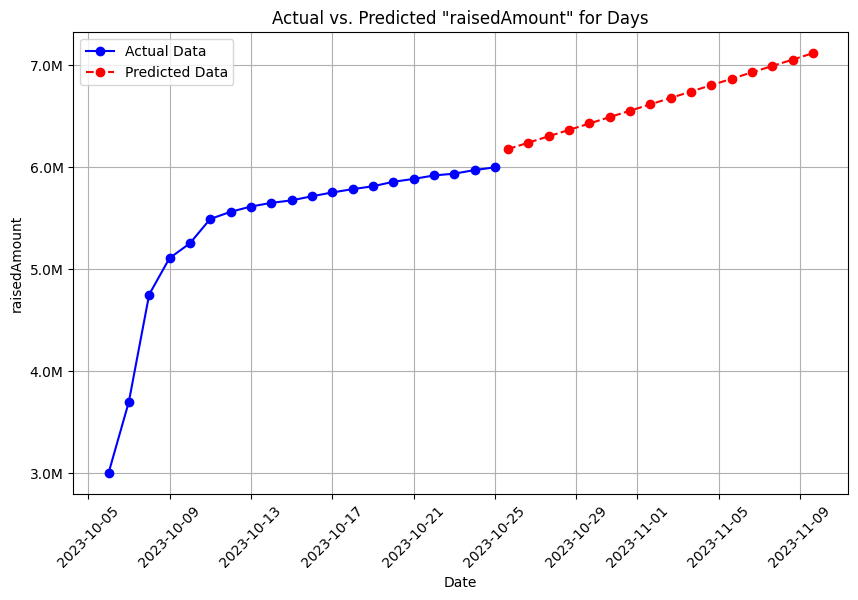

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
start_date = last_date
end_date = datetime(2023, 11, 10)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).mean()

# Plot the actual data points and predicted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['raisedAmount'], marker='o', linestyle='-', color='b', label='Actual Data')
plt.plot(date_range, future_predictions, marker='o', linestyle='--', color='r', label='Predicted Data')
plt.title('Actual vs. Predicted "raisedAmount" for Days')
plt.xlabel('Date')
plt.ylabel('raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


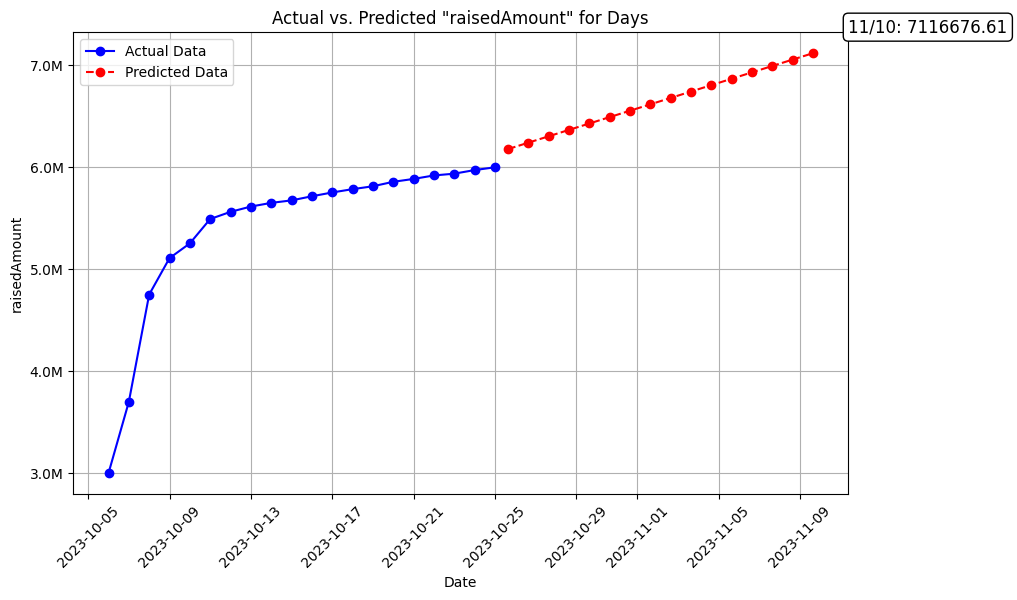

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
start_date = last_date
end_date = datetime(2023, 11, 10)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).mean()

# Plot the actual data points and predicted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['raisedAmount'], marker='o', linestyle='-', color='b', label='Actual Data')
plt.plot(date_range, future_predictions, marker='o', linestyle='--', color='r', label='Predicted Data')

# Add a box with the value for "11/10" from the predicted data on the upper right corner
value_11_10 = future_predictions[-1]
plt.annotate(f'11/10: {value_11_10:.2f}', xy=(1, 1), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.title('Actual vs. Predicted "raisedAmount" for Days')
plt.xlabel('Date')
plt.ylabel('raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


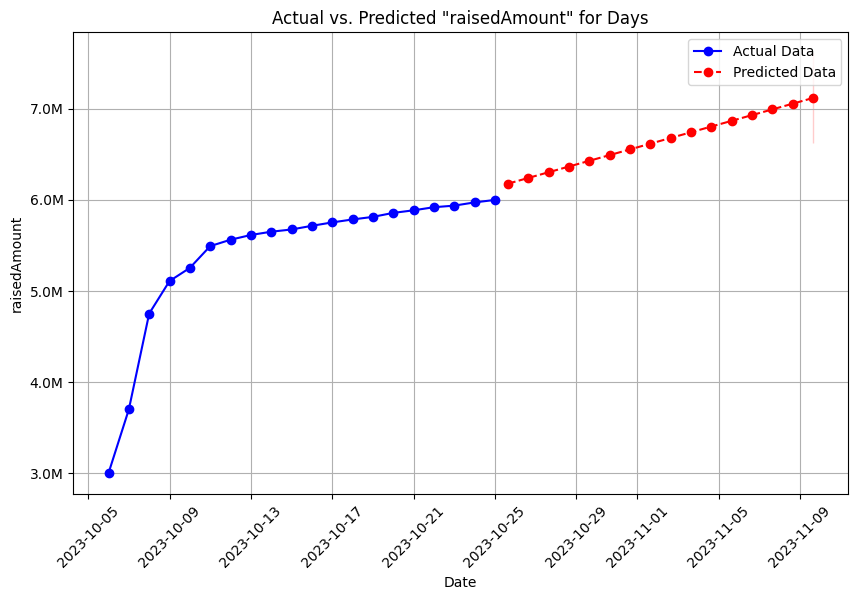

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
start_date = last_date
end_date = datetime(2023, 11, 10)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).mean()

# Calculate the standard error of the regression
std_error = (y - model.predict(X)).std()

# Calculate the error interval
error_interval = std_error * 1.96  # 95% confidence interval

# Plot the actual data points and predicted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['raisedAmount'], marker='o', linestyle='-', color='b', label='Actual Data')
plt.plot(date_range, future_predictions, marker='o', linestyle='--', color='r', label='Predicted Data')
plt.fill_between([date_range[-1]], [future_predictions[-1] - error_interval], [future_predictions[-1] + error_interval], color='r', alpha=0.2)
plt.title('Actual vs. Predicted "raisedAmount" for Days')
plt.xlabel('Date')
plt.ylabel('raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


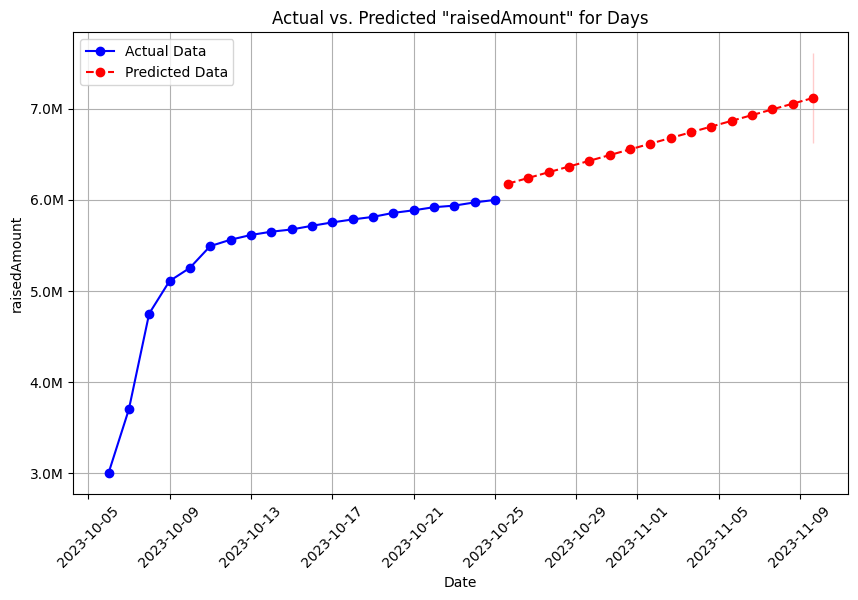

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
start_date = last_date
end_date = datetime(2023, 11, 10)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).mean()

# Calculate the standard error of the regression
std_error = (y - model.predict(X)).std()

# Calculate the error interval
error_interval = std_error * 1.96  # 95% confidence interval

# Plot the actual data points and predicted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['raisedAmount'], marker='o', linestyle='-', color='b', label='Actual Data')
plt.plot(date_range, future_predictions, marker='o', linestyle='--', color='r', label='Predicted Data')
plt.fill_between([date_range[-1]], [future_predictions[-1] - error_interval], [future_predictions[-1] + error_interval], color='r', alpha=0.2)
plt.title('Actual vs. Predicted "raisedAmount" for Days')
plt.xlabel('Date')
plt.ylabel('raisedAmount')
plt.xticks(rotation=45)
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(loc='upper left')  # Move the legend to the upper-left corner
plt.show()


In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
#add one day on the timestamp
start_date = last_date + timedelta(days=1)
# start_date = last_date  # Start from the next day
end_date = datetime(2023, 11, 10) + timedelta(days=1)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).mean()

# Create a dataframe for the predicted data with 'timestamp' column
predicted_data = pd.DataFrame({'timestamp': date_range, 'raisedAmount': future_predictions, 'Data_Type': 'Predicted'})

# Create a dataframe for the real data, excluding the 'timestamp' column
real_data = grouped_data.reset_index(drop=True)
real_data['Data_Type'] = 'Real'

# Convert "raisedAmount" to integers
real_data['raisedAmount'] = real_data['raisedAmount'].astype(int)
predicted_data['raisedAmount'] = predicted_data['raisedAmount'].astype(int)

# Combine the real and predicted dataframes
combined_data = pd.concat([real_data, predicted_data], ignore_index=True)

# Save the dataframes to CSV files
combined_data.to_csv('../../DataEng/datalake/gold/combined_data.csv', index=False)


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('../../DataEng/datalake/silver/data_after_stabilize.csv', sep=',')
df['timestamp'] = pd.to_datetime(df['datetime'])

# Find the last date in the dataset
last_date = df['timestamp'].max()

# Filter the data for dates from the last date to November 10
#add one day on the timestamp
start_date = last_date + timedelta(days=1)
# start_date = last_date  # Start from the next day
end_date = datetime(2023, 11, 10) + timedelta(days=1)
date_range = pd.date_range(start_date, end_date, freq='D')

# Convert the timestamp to Unix timestamps (numeric representation of time)
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Split the data into features (timestamp) and the target variable
X = df[['timestamp_numeric']]
y = df['raisedAmount']

# Initialize the regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the "raisedAmount" for the date range
date_range_numeric = [d.timestamp() for d in date_range]
future_predictions = model.predict([[timestamp] for timestamp in date_range_numeric])

# Group data by day and calculate the mean "raisedAmount" for each day
grouped_data = df.groupby(df['timestamp'].dt.date).max()

# Create a dataframe for the predicted data with 'timestamp' column
predicted_data = pd.DataFrame({'timestamp': date_range, 'raisedAmount': future_predictions, 'Data_Type': 'Predicted'})

# Create a dataframe for the real data, excluding the 'timestamp' column
real_data = grouped_data.reset_index(drop=True)
real_data['Data_Type'] = 'Real'

# Convert "raisedAmount" to integers
real_data['raisedAmount'] = real_data['raisedAmount'].astype(int)
predicted_data['raisedAmount'] = predicted_data['raisedAmount'].astype(int)

# Combine the real and predicted dataframes
combined_data = pd.concat([real_data, predicted_data], ignore_index=True)

# Save the dataframes to CSV files
combined_data.to_csv('../../DataEng/datalake/gold/previsao_dados_estabilizado.csv', index=False)


/home/alura/projeto_ghanor/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
